## Código Spectrograma

In [257]:
import numpy as np
from pylab import *
import scipy.io
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import chirp

Função para recolher as janelas

In [373]:
def cria_matriz(sinal, janela, passo):
    init = 0
    M = []
    a = 0
    win = np.hamming(janela)
    
    while True:   
        amostras = sinal[init:(init + janela)]
        if(len(amostras) == janela): 
            amostras = amostras[::-1]
            amostras = abs(np.fft.fftshift(np.fft.fft(amostras * win)))
            M = np.append(M,amostras)
            init += passo
            a += 1
            test = len(amostras)
        else:
            break
            
    M = M.reshape((a),janela).T
    linhas, colunas = M.shape
    linhas = int(np.ceil(linhas/2))
    final_matrix = M[0:linhas, 0:colunas]
   
    
    return final_matrix
    

In [ ]:
Declarando um sinal senoidal e um chirp

In [379]:
T = 5
n = 100000
t = np.linspace(0, T, n, endpoint=False)
f0 = 100
f1 = 10000
y = chirp(t, f0, T, f1, method='linear')
w = np.sin(2*pi*2000*t)

In [380]:
A = cria_matriz(y,500,250)
B = cria_matriz(w,500,250)

Espectrograma do sinal Chirp

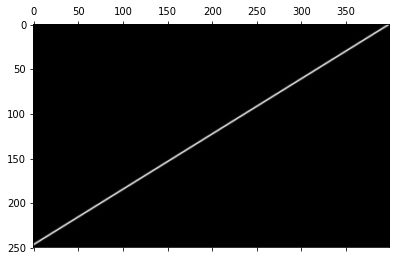

In [389]:
spec = matshow(A,cmap='gray',interpolation='bilinear')
plt.savefig('fig1.png')

Espectrograma sinal Senoidal

In [388]:
savefig('spec-chirp.png')

<Figure size 432x288 with 0 Axes>

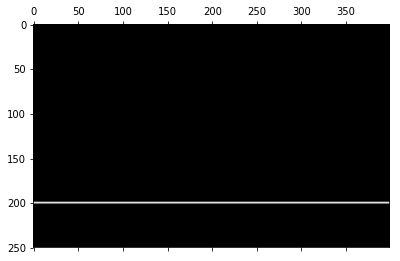

In [384]:
matshow(B,cmap='gray',interpolation='bilinear')